In [1]:
%cd ..
%pip install -e .

/home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
Obtaining file:///home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
  Preparing metadata (setup.py) ... done
  Attempting uninstall: src
    Found existing installation: src 0.1.0
    Uninstalling src-0.1.0:
      Successfully uninstalled src-0.1.0
  Running setup.py develop for src
Note: you may need to restart the kernel to use updated packages.


In [2]:
import random

from src.models.dense import NN0
from src.models.dense import NN1
from src.models.gcn import GCN0

from src.models.train_model import train
from src.models.train_model import train_conf_pen
from src.models.train_model import random_splits

from src.models.evaluate_model import evaluate0
from src.models.evaluate_model import evaluate1

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from sklearn.manifold import TSNE

from src.models.evaluate_model import test

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=T.NormalizeFeatures())
# no normalization, using n != 0 and m!= 0 instead
# doesnt work, just use normalization instead
# dataset = Planetoid(root='data/Planetoid', name='Cora')

data = dataset[0].to(device)
data = random_splits(data, 50, 20)
splits = data.train_mask, data.val_mask, data.test_mask

print('-------------------------------------------------------------')
print(f'train size: {data.train_mask.sum()}')
print(f'valid size: {data.valid_mask.sum()}')
print(f'test size: {data.test_mask.sum()}')
print('-------------------------------------------------------------')

metrics = []

for beta in range(11):
    beta = beta / 100
    torch.manual_seed(1)
    random.seed(1)

    gcn_model = GCN0(num_node_features=dataset.num_node_features,
                        num_classes=dataset.num_classes) \
                    .to(device)

    gcn_model = train_conf_pen(gcn_model, data, beta=beta, num_epochs=350)
    # gcn_model = train2(gcn_model, data)
    acc = evaluate0(gcn_model, data)
    # print(f'mu: {mu}, reg, Accuracy: {acc:.4f}')

    train_acc, val_acc, test_acc = evaluate1(gcn_model, data)
    metrics.append({'beta': beta, 'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc})
    print(f'beta: {beta}, train_acc: {train_acc:.4f}, val_acc: {val_acc:.4f}, test_acc: {test_acc:.4f}')
    print('-------------------------------------------------------------')



-------------------------------------------------------------
train size: 350
valid size: 140
test size: 2218
-------------------------------------------------------------
beta: 0.0, train_acc: 0.9886, val_acc: 0.8429, test_acc: 0.8368
-------------------------------------------------------------
beta: 0.01, train_acc: 0.9886, val_acc: 0.8429, test_acc: 0.8359
-------------------------------------------------------------
beta: 0.02, train_acc: 0.9886, val_acc: 0.8429, test_acc: 0.8350
-------------------------------------------------------------
beta: 0.03, train_acc: 0.9886, val_acc: 0.8429, test_acc: 0.8341
-------------------------------------------------------------
beta: 0.04, train_acc: 0.9886, val_acc: 0.8429, test_acc: 0.8327
-------------------------------------------------------------
beta: 0.05, train_acc: 0.9886, val_acc: 0.8429, test_acc: 0.8309
-------------------------------------------------------------
beta: 0.06, train_acc: 0.9886, val_acc: 0.8357, test_acc: 0.8291
--

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=T.NormalizeFeatures())
# no normalization, using n != 0 and m!= 0 instead
# doesnt work, just use normalization instead
# dataset = Planetoid(root='data/Planetoid', name='Cora')

data = dataset[0].to(device)
data = random_splits(data, 50, 20)
splits = data.train_mask, data.val_mask, data.test_mask

print('-------------------------------------------------------------')
print(f'train size: {data.train_mask.sum()}')
print(f'valid size: {data.valid_mask.sum()}')
print(f'test size: {data.test_mask.sum()}')
print('-------------------------------------------------------------')

metrics = []

for beta in range(11):
    beta = beta / 10
    torch.manual_seed(1)
    random.seed(1)

    gcn_model = GCN0(num_node_features=dataset.num_node_features,
                        num_classes=dataset.num_classes) \
                    .to(device)

    gcn_model = train_conf_pen(gcn_model, data, beta=beta, num_epochs=350)
    # gcn_model = train2(gcn_model, data)
    acc = evaluate0(gcn_model, data)
    # print(f'mu: {mu}, reg, Accuracy: {acc:.4f}')

    train_acc, val_acc, test_acc = evaluate1(gcn_model, data)
    metrics.append({'beta': beta, 'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc})
    print(f'beta: {beta}, train_acc: {train_acc:.4f}, val_acc: {val_acc:.4f}, test_acc: {test_acc:.4f}')
    print('-------------------------------------------------------------')



-------------------------------------------------------------
train size: 350
valid size: 140
test size: 2218
-------------------------------------------------------------
beta: 0.0, train_acc: 0.9943, val_acc: 0.8429, test_acc: 0.8354
-------------------------------------------------------------
beta: 0.1, train_acc: 0.9943, val_acc: 0.8429, test_acc: 0.8260
-------------------------------------------------------------
beta: 0.2, train_acc: 0.9943, val_acc: 0.8286, test_acc: 0.7962
-------------------------------------------------------------
beta: 0.3, train_acc: 0.9943, val_acc: 0.8000, test_acc: 0.7922
-------------------------------------------------------------
beta: 0.4, train_acc: 0.9943, val_acc: 0.7857, test_acc: 0.7827
-------------------------------------------------------------
beta: 0.5, train_acc: 0.9943, val_acc: 0.7857, test_acc: 0.7786
-------------------------------------------------------------
beta: 0.6, train_acc: 0.9943, val_acc: 0.7714, test_acc: 0.7669
--------

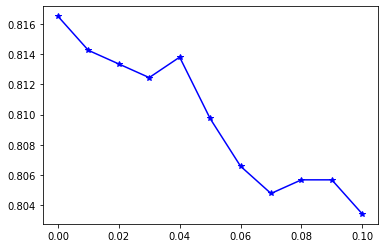

In [4]:
import pandas as pd
import numpy as np


df = pd.DataFrame(metrics)
fig, ax = plt.subplots()
ax.plot(df['beta'], df['test_acc'], '-b*',)
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=T.NormalizeFeatures())
# no normalization, using n != 0 and m!= 0 instead
# doesnt work, just use normalization instead
# dataset = Planetoid(root='data/Planetoid', name='Cora')

data = dataset[0].to(device)
data = random_splits(data, 50, 20)
splits = data.train_mask, data.val_mask, data.test_mask

print('-------------------------------------------------------------')
print(f'train size: {data.train_mask.sum()}')
print(f'valid size: {data.valid_mask.sum()}')
print(f'test size: {data.test_mask.sum()}')
print('-------------------------------------------------------------')

metrics = []

for beta in range(11):
    beta = beta / 1000
    torch.manual_seed(1)
    random.seed(1)

    gcn_model = GCN0(num_node_features=dataset.num_node_features,
                        num_classes=dataset.num_classes) \
                    .to(device)

    gcn_model = train_conf_pen(gcn_model, data, beta=beta, num_epochs=350)
    # gcn_model = train2(gcn_model, data)
    acc = evaluate0(gcn_model, data)
    # print(f'mu: {mu}, reg, Accuracy: {acc:.4f}')

    train_acc, val_acc, test_acc = evaluate1(gcn_model, data)
    metrics.append({'beta': beta, 'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc})
    print(f'beta: {beta}, train_acc: {train_acc:.4f}, val_acc: {val_acc:.4f}, test_acc: {test_acc:.4f}')
    print('-------------------------------------------------------------')



-------------------------------------------------------------
train size: 350
valid size: 140
test size: 2218
-------------------------------------------------------------
beta: 0.0, train_acc: 0.9943, val_acc: 0.8429, test_acc: 0.8354
-------------------------------------------------------------
beta: 0.001, train_acc: 0.9914, val_acc: 0.7286, test_acc: 0.7227
-------------------------------------------------------------
beta: 0.002, train_acc: 0.9914, val_acc: 0.7286, test_acc: 0.7042
-------------------------------------------------------------
beta: 0.003, train_acc: 0.9914, val_acc: 0.7357, test_acc: 0.6894
-------------------------------------------------------------
beta: 0.004, train_acc: 0.9886, val_acc: 0.7357, test_acc: 0.6939
-------------------------------------------------------------
beta: 0.005, train_acc: 0.9886, val_acc: 0.7429, test_acc: 0.6835
-------------------------------------------------------------
beta: 0.006, train_acc: 0.9886, val_acc: 0.7357, test_acc: 0.6

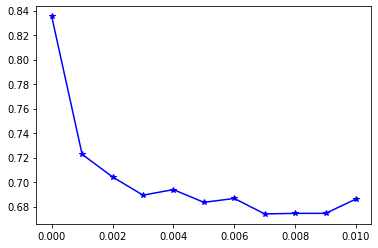

In [ ]:
import pandas as pd
import numpy as np


df = pd.DataFrame(metrics)
fig, ax = plt.subplots()
ax.plot(df['beta'], df['test_acc'], '-b*',)
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=T.NormalizeFeatures())
# no normalization, using n != 0 and m!= 0 instead
# doesnt work, just use normalization instead
# dataset = Planetoid(root='data/Planetoid', name='Cora')

data = dataset[0].to(device)
data = random_splits(data, 50, 20)
splits = data.train_mask, data.val_mask, data.test_mask

print('-------------------------------------------------------------')
print(f'train size: {data.train_mask.sum()}')
print(f'valid size: {data.valid_mask.sum()}')
print(f'test size: {data.test_mask.sum()}')
print('-------------------------------------------------------------')

metrics = []

for beta in range(11):
    beta = beta / 10000
    torch.manual_seed(1)
    random.seed(1)

    gcn_model = GCN0(num_node_features=dataset.num_node_features,
                        num_classes=dataset.num_classes) \
                    .to(device)

    gcn_model = train_conf_pen(gcn_model, data, beta=beta, num_epochs=350)
    # gcn_model = train2(gcn_model, data)
    acc = evaluate0(gcn_model, data)
    # print(f'mu: {mu}, reg, Accuracy: {acc:.4f}')

    train_acc, val_acc, test_acc = evaluate1(gcn_model, data)
    metrics.append({'beta': beta, 'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc})
    print(f'beta: {beta}, train_acc: {train_acc:.4f}, val_acc: {val_acc:.4f}, test_acc: {test_acc:.4f}')
    print('-------------------------------------------------------------')



-------------------------------------------------------------
train size: 350
valid size: 140
test size: 2218
-------------------------------------------------------------
beta: 0.0, train_acc: 0.9943, val_acc: 0.8500, test_acc: 0.8318
-------------------------------------------------------------
beta: 0.0001, train_acc: 0.9943, val_acc: 0.8143, test_acc: 0.7949
-------------------------------------------------------------
beta: 0.0002, train_acc: 0.9971, val_acc: 0.7571, test_acc: 0.7692
-------------------------------------------------------------
beta: 0.0003, train_acc: 0.9971, val_acc: 0.7429, test_acc: 0.7565
-------------------------------------------------------------
beta: 0.0004, train_acc: 0.9971, val_acc: 0.7357, test_acc: 0.7299
-------------------------------------------------------------
beta: 0.0005, train_acc: 0.9914, val_acc: 0.7429, test_acc: 0.7164
-------------------------------------------------------------
beta: 0.0006, train_acc: 0.9914, val_acc: 0.7286, test_ac

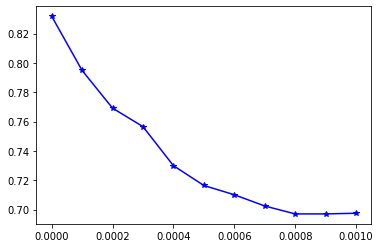

In [ ]:
import pandas as pd
import numpy as np


df = pd.DataFrame(metrics)
fig, ax = plt.subplots()
ax.plot(df['beta'], df['test_acc'], '-b*',)
plt.show()